## Assignment 3D

### Problem 1 (50 points)
The Lotka–Volterra equations are a mathematical model of predator–prey interactions between biological species. Let two variables $x$ and $y$ be proportional to the size of the populations of two species, traditionally called “rabbits” (the prey) and “foxes” (the predators). You could think of $x$ and $y$ as being the population in thousands, say, so that $x = 2$ means there are $2000$ rabbits. Strictly the only allowed values of $x$ and $y$ would then be multiples of $0.001$, since you can only have whole numbers of rabbits or foxes. But $0.001$ is a pretty close spacing of values, so it’s a decent approximation to treat $x$ and $y$ as continuous real numbers so long as neither gets very close to zero.

In the Lotka–Volterra model, the rabbits reproduce at a rate proportional to their population, but are eaten by the foxes at a rate proportional to both their own population and the population of foxes:
$$\dfrac{dx}{dt}=\alpha x-\beta xy$$
where $\alpha$ and $\beta$ are constants. At the same time, the foxes reproduce at a rate proportional to the rate at which they eat rabbits—because they need food to grow and reproduce—but also die of old age at a rate proportional to their own population:
$$\dfrac{dy}{dt}=\gamma xy-\delta y$$
where $\gamma$ and $\delta$ are also constants.

#### Problem 1.A
Write a program to solve these equations using the 4th-Order Runge–Kutta method for the case $\alpha=1,\beta=\gamma=0.5$ and $\delta=2$, starting from the initial condition x = y = 2. Have the program make a graph showing both $x$ and $y$ as a function of time on the same axes from $t = 0$ to $t = 30$.


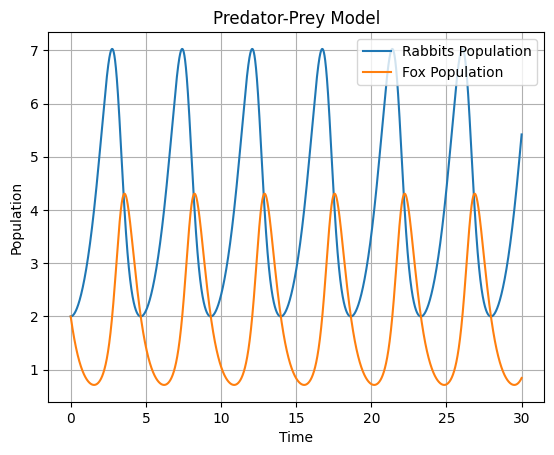

In [38]:
import numpy as np

# Runge-Kutta Method
def runge_kutta_method_function(
    f: callable,
    t0: float | int,
    x0: float | int | np.ndarray | tuple | list,
    dt: float | int,
    tf: float | int
) -> tuple[np.ndarray, np.ndarray]:
    assert callable(f)
    assert isinstance(t0, (int, float))
    assert isinstance(x0, (int, float, np.ndarray, tuple, list))
    assert isinstance(dt, (int, float))
    assert isinstance(tf, (int, float))
    t = np.arange(t0, tf+dt, dt)
    x = [x0]
    for i in range(len(t)-1):
        k1 = f(t[i], x[-1])
        k2 = f(t[i] + dt/2, x[-1] + k1*dt/2)
        k3 = f(t[i] + dt/2, x[-1] + k2*dt/2)
        k4 = f(t[i] + dt, x[-1] + k3*dt)
        x.append(x[-1] + (k1 + 2*k2 + 2*k3 + k4)*dt/6)
    return t, x

# Problem Information
ALPHA = 1.0
BETA = 0.5
GAMMA = 0.5
DELTA = 2.0
x0: list = [2, 2]
t0: float = 0
dt: float = 0.001
tf: float = 30
f: callable = lambda t, x: np.array([ALPHA*x[0] - BETA*x[0]*x[1], GAMMA*x[0]*x[1] - DELTA*x[1]])

# Solve the Problem
t, x_vec = runge_kutta_method_function(f, t0, x0, dt, tf)
x = np.array([x[0] for x in x_vec])
y = np.array([x[1] for x in x_vec])

# Plot the Results
import matplotlib.pyplot as plt
plt.plot(t, x, label="Rabbits Population")
plt.plot(t, y, label="Fox Population")
plt.xlabel("Time")
plt.ylabel("Population")
plt.title("Predator-Prey Model")
plt.legend()
plt.grid()
plt.show()

#### Problem 1.B
Describe in words what is going on in the system, in terms of rabbits and foxes.

There is a periodic nature of Foxes and Rabbits, since:
1. Less Foxes -> More Rabbits
2. More Rabbits -> More Foxes
3. More Foxes -> Less Rabbits
4. Less Rabbits -> Less Foxes

...ad infinitum.

### Problem 2 (50 points)
A pendulum (like the one in lecture notes) can be driven by, for example, exerting a small oscillating force horizontally on the mass. Then the equation of motion for the pendulum becomes:
$$\dfrac{d^2\theta}{dt^2}=-\dfrac{g}{l}\sin\theta+C\cos\theta\sin(\Omega t)$$
where $C$ and $\Omega$ are constants.

#### Problem 2.A
Write a program to solve this equation for $\theta$ as a function of time with $l = 10\text{cm}$, $C = 2\text{s}^{−2}$, and $Ω = 5 \text{s}^{−1}$ and make a plot of $\theta$ as a function of time from $t = 0$ to $t = 100\text{s}$. Start the pendulum at rest with $\theta = 0$ and $\omega=0$. Using the 4th-Order Runge–Kutta is a better choice.

In order to solve the system, we must split the 2nd order differential equation into two, 1st order differential equations.
$$\dfrac{d^2\theta}{dt^2}=-\dfrac{g}{l}\sin\theta+C\cos\theta\sin(\Omega t)
\implies \dfrac{d^2\theta}{dt^2}=F\left(t,\theta(t),\omega(t)\right)$$
So we can the write the model as the following:
$$\begin{align}
\dfrac{d\theta}{dt}&=\omega\\
\dfrac{d\omega}{dt}&=-\dfrac{g}{l}\sin\theta+C\cos\theta\sin(\Omega t)\\
\end{align}$$
In total, we can see that:
$$\dfrac{d}{dt}\begin{bmatrix}\theta\\\omega\end{bmatrix}=\begin{bmatrix}\omega\\-\dfrac{g}{l}\sin\theta+C\cos\theta\sin(\Omega t)\end{bmatrix}$$

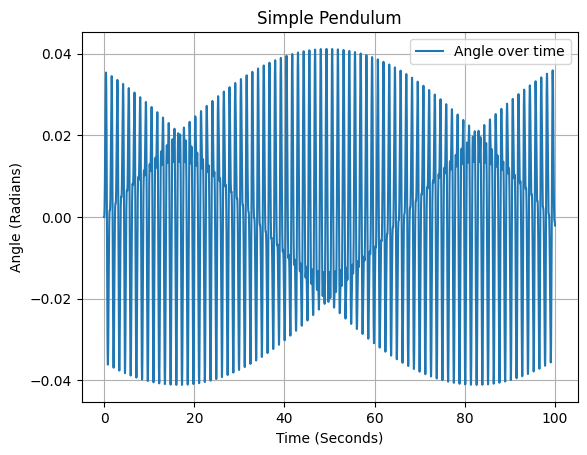

In [39]:
import numpy as np

# Runge-Kutta Method
def runge_kutta_method_function(
    f: callable,
    t0: float | int,
    x0: float | int | np.ndarray | tuple | list,
    dt: float | int,
    tf: float | int
) -> tuple[np.ndarray, np.ndarray]:
    assert callable(f)
    assert isinstance(t0, (int, float))
    assert isinstance(x0, (int, float, np.ndarray, tuple, list))
    assert isinstance(dt, (int, float))
    assert isinstance(tf, (int, float))
    t = np.arange(t0, tf+dt, dt)
    x = [x0]
    for i in range(len(t)-1):
        k1 = f(t[i], x[-1])
        k2 = f(t[i] + dt/2, x[-1] + k1*dt/2)
        k3 = f(t[i] + dt/2, x[-1] + k2*dt/2)
        k4 = f(t[i] + dt, x[-1] + k3*dt)
        x.append(x[-1] + (k1 + 2*k2 + 2*k3 + k4)*dt/6)
    return t, x

# Problem Information
G = 9.81    # m/s^2
L = 0.1     # m
C = 2       # s^{-2}
OMEGA = 5   # s^{-1}
theta0 = 0
omega0 = 0
f: callable = lambda t, x_vec: np.array([x_vec[1], -G/L * np.sin(x_vec[0])+C*np.cos(x_vec[0])*np.sin(OMEGA*t)])
t0: float = 0
x0: list = [theta0, omega0]
dt: float = 0.001
tf: float = 100

# Solve the Problem
t, x_vec = runge_kutta_method_function(f, t0, x0, dt, tf)
theta = np.array([x[0] for x in x_vec])
omega = np.array([x[1] for x in x_vec])

# Plot the Results
import matplotlib.pyplot as plt
plt.plot(t, theta, label="Angle over time")
plt.xlabel("Time (Seconds)")
plt.ylabel("Angle (Radians)")
plt.title("Simple Pendulum")
plt.legend()
plt.grid()

#### Problem 2.B
Now change the value of $\Omega$, while keeping $C$ the same, to find a value for which the pendulum resonates with the driving force and swings widely from side to side. Make a plot for this case also.


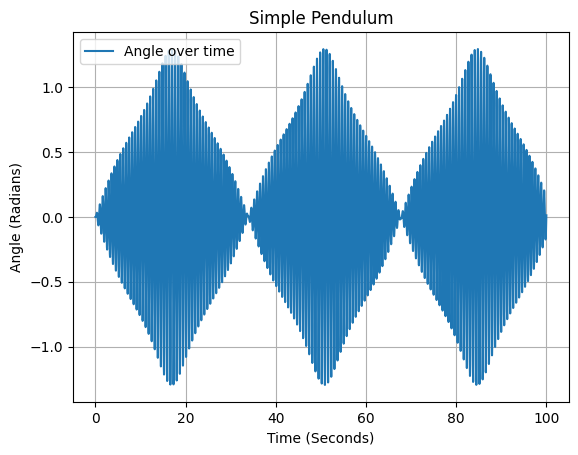

In [49]:
import numpy as np

# Runge-Kutta Method
def runge_kutta_method_function(
    f: callable,
    t0: float | int,
    x0: float | int | np.ndarray | tuple | list,
    dt: float | int,
    tf: float | int
) -> tuple[np.ndarray, np.ndarray]:
    assert callable(f)
    assert isinstance(t0, (int, float))
    assert isinstance(x0, (int, float, np.ndarray, tuple, list))
    assert isinstance(dt, (int, float))
    assert isinstance(tf, (int, float))
    t = np.arange(t0, tf+dt, dt)
    x = [x0]
    for i in range(len(t)-1):
        k1 = f(t[i], x[-1])
        k2 = f(t[i] + dt/2, x[-1] + k1*dt/2)
        k3 = f(t[i] + dt/2, x[-1] + k2*dt/2)
        k4 = f(t[i] + dt, x[-1] + k3*dt)
        x.append(x[-1] + (k1 + 2*k2 + 2*k3 + k4)*dt/6)
    return t, x

# Problem Information
G = 9.81    # m/s^2
L = 0.1     # m
C = 2       # s^{-2}
OMEGA = 9.539   # s^{-1}
theta0 = 0
omega0 = 0
f: callable = lambda t, x_vec: np.array([x_vec[1], -G/L * np.sin(x_vec[0])+C*np.cos(x_vec[0])*np.sin(OMEGA*t)])
t0: float = 0
x0: list = [theta0, omega0]
dt: float = 0.001
tf: float = 100

# Solve the Problem
t, x_vec = runge_kutta_method_function(f, t0, x0, dt, tf)
theta = np.array([x[0] for x in x_vec])
omega = np.array([x[1] for x in x_vec])

# Plot the Results
import matplotlib.pyplot as plt
plt.plot(t, theta, label="Angle over time")
plt.xlabel("Time (Seconds)")
plt.ylabel("Angle (Radians)")
plt.title("Simple Pendulum")
plt.legend()
plt.grid()

I found that the resonant frequency of the system was approximately $\omega\approx2\pi\cdot\dfrac{7.75\text{ Cycles}}{5}$ using the case of an offset pendulum without a driving force.

From there, I was able to adjust the number around until I found $\Omega\approx9.539\text{ rad/s}$.
Therefore the motor should be driven at this frequency to get as close to the resonant frequency as possible.